# Lesson 1. A Single Neuron

The Linear Unit : y = wx + b

Multiple Inputs : y = w0x0 + w1x1 + w2x2 + b

Linear Units in Keras : through **keras.Sequential** -> creates a neural network as a stack of layers

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Lesson 2. Deep Neural Networks

### Layers
-> Neural networks organize their neurons into layers => dense layer

### The activation function
-> function we apply to each of a layers' outputs
ex) The Rectifier Function aka ReLU function

### Stacking Dense Layers
-> Building Sequential Models : first layer gets the input, last layer produces the input

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

# Lesson 3. Stochastic Gradient Descent

### Loss Function
-> Measures how good the network's predictions are<br>
-> Measures the disparity between the true value and the prediction

For regression problems, the common loss function is the **mean absolute error, aka MAE**<br>
    -> abs(y_true - y_pred)<br>
Other loss functions : Mean-squared error(MSE), Huber loss


### Optimizer - Stochastic Gradient Descent
-> Can tell the network how to change its weights<br>
-> The algorithm that adjusts the weights to minimize the loss<br>

-> Steps of training : <br>
1) Sample training adata and run it to make predictions
2) Measure the loss
3) Adjust the weights to make loss smaller
4) Repeat this process until the loss is small enough
<br>
**Minibatch** : each iteration's sample of training data<br>
**Epoch** : complete round of the training data<br>

#### Learning Rate and Batch Size
**Learning Rate** : determines size of the shifts
**Adam** : SGD algorithm with adaptive learning rate, great general-purpose optimizer<br>

#### Adding the Loss and Optimizer
-> compile method

#### Example : Red Wine Quality

In [6]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./archive/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [7]:
print(X_train.shape)

(1119, 11)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile in the optimizer and loss function
model.compile(
    optimizer="adam",
    loss="mae",
)

In [10]:
# Start training
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.3529 - val_loss: 0.1405
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1395 - val_loss: 0.1357
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1284 - val_loss: 0.1233
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1210 - val_loss: 0.1201
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1105 - val_loss: 0.1087
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1107 - val_loss: 0.1105
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1088 - val_loss: 0.1045
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1047 - val_loss: 0.1043
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1031 - val_loss: 0.1028
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1012 - val_loss: 0.1004


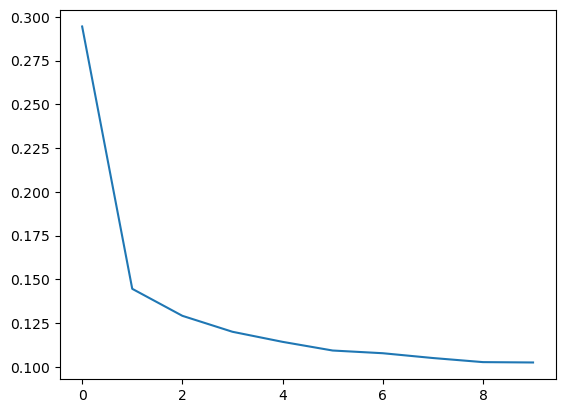

In [11]:
# Convert data to Pandas dataframe for easy plotting
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

# Lesson 4. Overfitting and Underfitting

#### Interpreting the Learning Curves
We can get the model to learn more signal at the cost of learning more noise.<br>
But at a certain point, the cost exceeds the benefit and validation loss begins rising.<br>
**Underfitting** : loss is not low enough because the model hasn't learned enough signal<br>
**Overfitting** : loss is not low enough because the model learned too much moise<br>
Need to find the best balance between the two.<br>

#### Capacity
-> The size and complexity of the patterns the model is able to learn<br>
-> Can increase it by making it wider(more units) or deeper(more layer)<br>
    -> Wider networks are more for linear relationships, whereas deeper networks are more for nonlinear ones<br>

#### Early Stopping
-> Interrupting the training when the validation loss isn't decreasing anymore<br>
-> In Keras, we include early stopping using **callback**

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

#### Example - Train a model with Early Stopping

In [15]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./archive/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [16]:
# Increase capacity of the network and define callback
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.09108646959066391


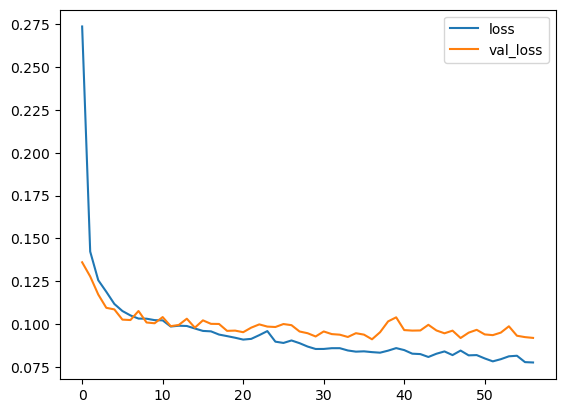

In [17]:
# Add callback as an argument in fit
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Lesson 5. Dropout and Batch Normalization

#### Dropout
-> Randomly drop out some fraction of a layer's input units every step of training, making it harder for the network to learn patters in the training data

#### Batch Normalization
-> Helps correct training that is slow or unstable<br>
-> **Batch normalization layer** : first normalize the batch with its own mean and standard deviation,<br>
then puts the data on a new scale with 2 trainable rescaling parameters

#### Example - Using Dropout and Batch Normalization

In [2]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # or 'classic'

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('./archive/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


In [3]:
# Increase the number of units in the dense layers
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


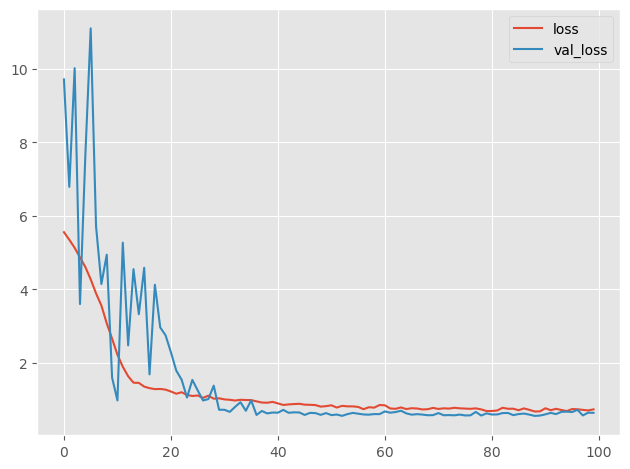

In [4]:
# Set up training
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();


# Lesson 6. Binary Classification

#### Accuracy and Cross-Entropy
**Accuracy** : metrics in use for measuring success on a classification problem<br>
-> Accuracy = number_correct / total<br>
-> Problem : cannot be used as a loss function<br>
=> Substitute : **Cross-entropy function** : measure for the distance from one probability distribution to another<br>

#### Making probabilities with the Sigmoid Function
**Sigmoid activation** : activation function used to convert the real-valued outputs produced bya dense layer into probabilities<br>

#### Example : Binary Classification

In [5]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('./archive/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [6]:
# define model and include sigmoid activatoin in the final layer so that model produces class probabilities
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Add cross-entropy loss and accuracy metric to the model + compile method
# use binary versions for two-calss problems + Adam optimizer
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [8]:
# Include Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.3370
Best Validation Accuracy: 0.8952


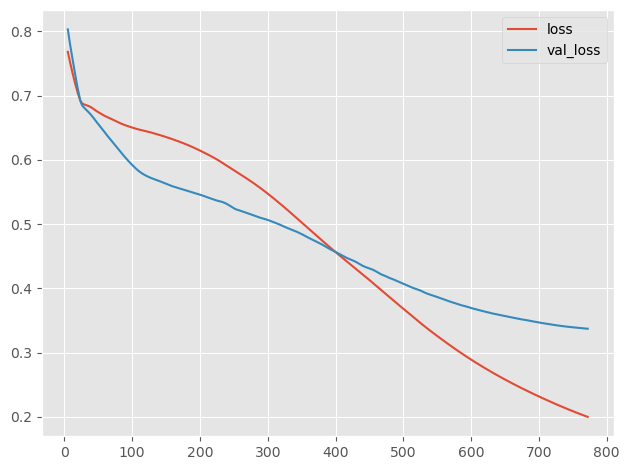

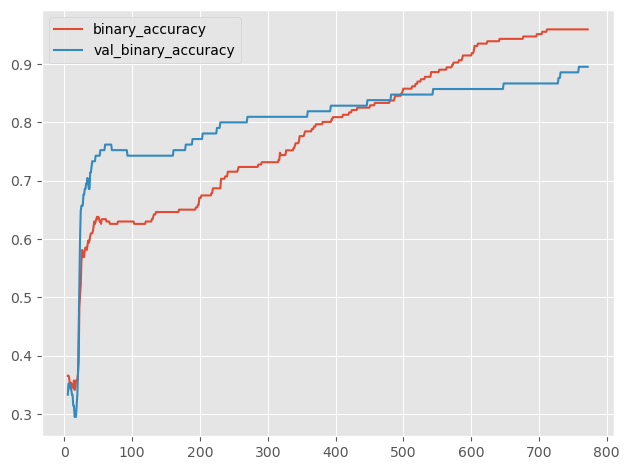

In [9]:
# Learning curves, look at best values for loss and accuracy on the validation set
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))